# Qwen Ratings Analysis
## Chain-of-Thought Reasoning Evaluation

This notebook analyzes the ratings generated by the Qwen/Qwen2.5-14B-Instruct model with Chain-of-Thought reasoning for the autoeval chatbot conversations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load Qwen ratings data
qwen_df = pd.read_csv('../ratings/qwen/overall/overall_ratings.csv', 
                      names=['conversation_id', 'helpfulness', 'clarity', 'accuracy', 
                             'helpfulness_reasoning', 'clarity_reasoning', 'accuracy_reasoning',
                             'total_turns', 'avg_user_length', 'avg_bot_length', 'language', 
                             'sensitive_score', 'sensitive_count'])

print(f"Loaded {len(qwen_df)} conversations from Qwen ratings")
print(f"Columns: {list(qwen_df.columns)}")
qwen_df.head(3)

Loaded 500 conversations from Qwen ratings
Columns: ['conversation_id', 'helpfulness', 'clarity', 'accuracy', 'helpfulness_reasoning', 'clarity_reasoning', 'accuracy_reasoning', 'total_turns', 'avg_user_length', 'avg_bot_length', 'language', 'sensitive_score', 'sensitive_count']


,conversation_id,helpfulness,clarity,accuracy,helpfulness_reasoning,clarity_reasoning,accuracy_reasoning,total_turns,avg_user_length,avg_bot_length,language,sensitive_score,sensitive_count
0,conv_000,9.0,9.0,9.0,The information provided was generally helpful...,The chatbot provides clear and concise explana...,The chatbot's responses were accurate and dire...,30,17.73,109.63,German,0.0,0
1,conv_001,8.0,8.0,8.0,The information provided was generally helpful...,The chatbot provided clear and focused explana...,The chatbot provides accurate and detailed res...,30,16.37,102.47,German,0.0,0
2,conv_002,8.0,8.0,9.0,The information provided was generally helpful...,The chatbot provided clear and focused explana...,The chatbot's responses are accurate and direc...,30,16.63,103.43,German,0.0,0


## Data Overview and Summary Statistics

In [4]:
# Basic statistics for the three rating dimensions
rating_cols = ['helpfulness', 'clarity', 'accuracy']
rating_stats = qwen_df[rating_cols].describe()

print("=== QWEN RATINGS SUMMARY ===")
print(rating_stats)
print("\n=== MISSING VALUES ===")
print(qwen_df[rating_cols].isnull().sum())
print("\n=== RATING DISTRIBUTION ===")
for col in rating_cols:
    print(f"\n{col.upper()}:")
    print(qwen_df[col].value_counts().sort_index())

=== QWEN RATINGS SUMMARY ===
       helpfulness     clarity    accuracy
count   500.000000  500.000000  500.000000
mean      8.352000    8.272000    7.834000
std       0.581181    0.749092    1.279734
min       5.500000    5.500000    5.500000
25%       8.000000    8.000000    8.000000
50%       8.000000    8.000000    8.000000
75%       9.000000    9.000000    9.000000
max       9.000000    9.000000    9.000000

=== MISSING VALUES ===
helpfulness    0
clarity        0
accuracy       0
dtype: int64

=== RATING DISTRIBUTION ===

HELPFULNESS:
helpfulness
5.5      6
7.0      1
8.0    301
9.0    192
Name: count, dtype: int64

CLARITY:
clarity
5.5     20
7.0      3
8.0    288
9.0    189
Name: count, dtype: int64

ACCURACY:
accuracy
5.5    104
7.0      2
8.0    215
9.0    179
Name: count, dtype: int64


## Rating Distributions Visualization

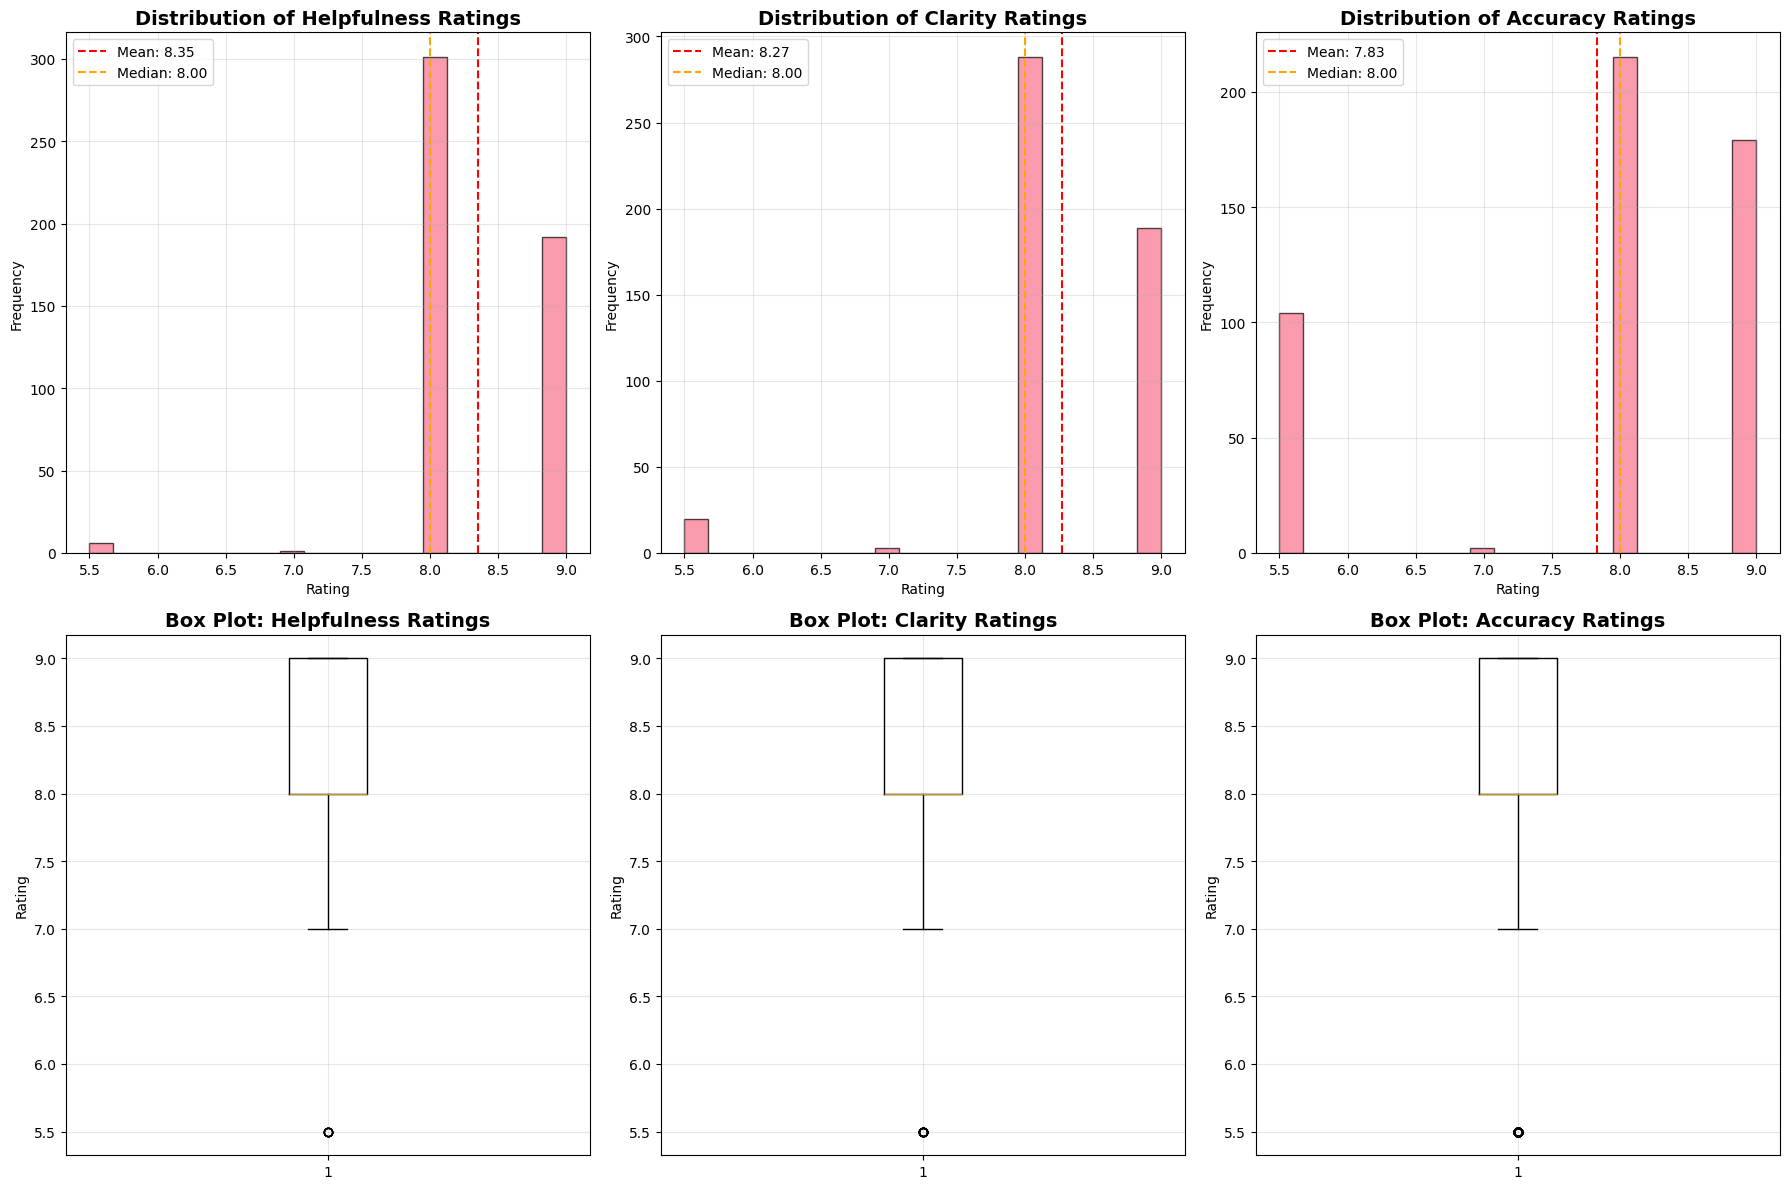

In [5]:
# Create comprehensive visualization of rating distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histograms for each rating dimension
for i, col in enumerate(rating_cols):
    # Histogram
    axes[0, i].hist(qwen_df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Distribution of {col.title()} Ratings', fontsize=14, fontweight='bold')
    axes[0, i].set_xlabel('Rating')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add mean and median lines
    mean_val = qwen_df[col].mean()
    median_val = qwen_df[col].median()
    axes[0, i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[0, i].axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[0, i].legend()
    
    # Box plots
    axes[1, i].boxplot(qwen_df[col], vert=True)
    axes[1, i].set_title(f'Box Plot: {col.title()} Ratings', fontsize=14, fontweight='bold')
    axes[1, i].set_ylabel('Rating')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

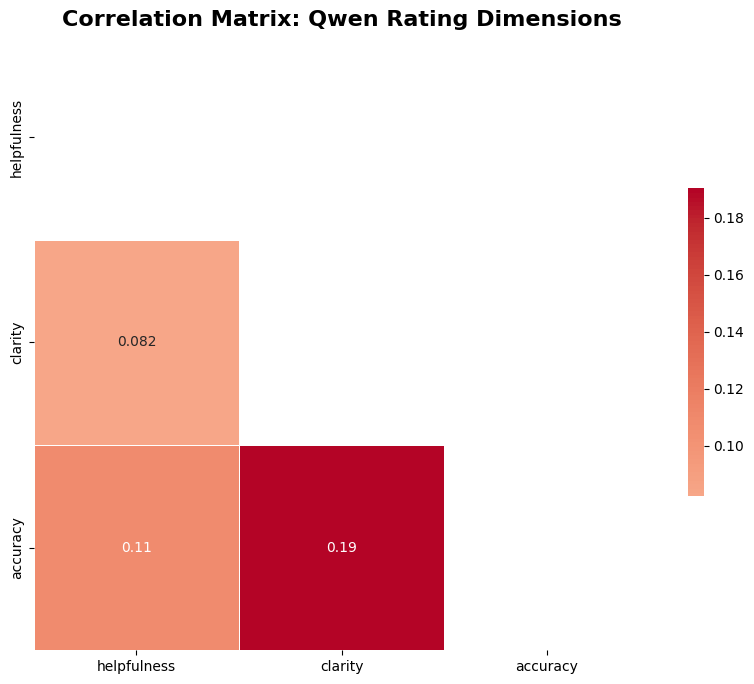

=== CORRELATION COEFFICIENTS ===
             helpfulness   clarity  accuracy
helpfulness     1.000000  0.082295  0.108360
clarity         0.082295  1.000000  0.190392
accuracy        0.108360  0.190392  1.000000

=== PAIRWISE CORRELATIONS ===
helpfulness vs clarity: 0.082
helpfulness vs accuracy: 0.108
clarity vs accuracy: 0.190


In [6]:
# Correlation analysis between rating dimensions
correlation_matrix = qwen_df[rating_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix: Qwen Rating Dimensions', fontsize=16, fontweight='bold')
plt.show()

print("=== CORRELATION COEFFICIENTS ===")
print(correlation_matrix)

# Calculate and display specific correlations
print("\n=== PAIRWISE CORRELATIONS ===")
from itertools import combinations
for col1, col2 in combinations(rating_cols, 2):
    corr = qwen_df[col1].corr(qwen_df[col2])
    print(f"{col1} vs {col2}: {corr:.3f}")

## Conversation Characteristics Analysis

In [ ]:
# Analyze relationship between conversation characteristics and ratings
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average rating vs total turns
qwen_df['avg_rating'] = qwen_df[rating_cols].mean(axis=1)
axes[0, 0].scatter(qwen_df['total_turns'], qwen_df['avg_rating'], alpha=0.6)
axes[0, 0].set_xlabel('Total Turns')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Average Rating vs Total Turns')
axes[0, 0].grid(True, alpha=0.3)

# Add correlation coefficient
corr_turns = qwen_df['total_turns'].corr(qwen_df['avg_rating'])
axes[0, 0].text(0.05, 0.95, f'Correlation: {corr_turns:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Average rating vs average bot response length
axes[0, 1].scatter(qwen_df['avg_bot_length'], qwen_df['avg_rating'], alpha=0.6)
axes[0, 1].set_xlabel('Average Bot Response Length')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating vs Bot Response Length')
axes[0, 1].grid(True, alpha=0.3)

corr_bot_length = qwen_df['avg_bot_length'].corr(qwen_df['avg_rating'])
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr_bot_length:.3f}', transform=axes[0, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Average rating vs average user message length
axes[1, 0].scatter(qwen_df['avg_user_length'], qwen_df['avg_rating'], alpha=0.6)
axes[1, 0].set_xlabel('Average User Message Length')
axes[1, 0].set_ylabel('Average Rating')
axes[1, 0].set_title('Average Rating vs User Message Length')
axes[1, 0].grid(True, alpha=0.3)

corr_user_length = qwen_df['avg_user_length'].corr(qwen_df['avg_rating'])
axes[1, 0].text(0.05, 0.95, f'Correlation: {corr_user_length:.3f}', transform=axes[1, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Language distribution
language_counts = qwen_df['language'].value_counts()
axes[1, 1].pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Distribution of Languages')

plt.tight_layout()
plt.show()

## Sensitive Content Analysis

In [ ]:
# Analyze sensitive content and its relationship to ratings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sensitive score distribution
axes[0].hist(qwen_df['sensitive_score'], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sensitive Scores')
axes[0].set_xlabel('Sensitive Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Sensitive count distribution
axes[1].hist(qwen_df['sensitive_count'], bins=20, alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Sensitive Counts')
axes[1].set_xlabel('Sensitive Count')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Average rating vs sensitive score
axes[2].scatter(qwen_df['sensitive_score'], qwen_df['avg_rating'], alpha=0.6)
axes[2].set_xlabel('Sensitive Score')
axes[2].set_ylabel('Average Rating')
axes[2].set_title('Average Rating vs Sensitive Score')
axes[2].grid(True, alpha=0.3)

corr_sensitive = qwen_df['sensitive_score'].corr(qwen_df['avg_rating'])
axes[2].text(0.05, 0.95, f'Correlation: {corr_sensitive:.3f}', transform=axes[2].transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("=== SENSITIVE CONTENT STATISTICS ===")
print(f"Mean sensitive score: {qwen_df['sensitive_score'].mean():.3f}")
print(f"Mean sensitive count: {qwen_df['sensitive_count'].mean():.3f}")
print(f"Conversations with sensitive content: {(qwen_df['sensitive_score'] > 0).sum()}")
print(f"Percentage with sensitive content: {(qwen_df['sensitive_score'] > 0).mean()*100:.1f}%")

## High and Low Performing Conversations

In [ ]:
# Identify top and bottom performing conversations
top_10_idx = qwen_df['avg_rating'].nlargest(10).index
bottom_10_idx = qwen_df['avg_rating'].nsmallest(10).index

print("=== TOP 10 RATED CONVERSATIONS ===")
top_10 = qwen_df.loc[top_10_idx, ['conversation_id', 'helpfulness', 'clarity', 'accuracy', 'avg_rating', 'total_turns']]
print(top_10.to_string())

print("\n=== BOTTOM 10 RATED CONVERSATIONS ===")
bottom_10 = qwen_df.loc[bottom_10_idx, ['conversation_id', 'helpfulness', 'clarity', 'accuracy', 'avg_rating', 'total_turns']]
print(bottom_10.to_string())

# Compare characteristics of high vs low rated conversations
print("\n=== COMPARISON: HIGH vs LOW RATED CONVERSATIONS ===")
high_rated = qwen_df[qwen_df['avg_rating'] >= 8.5]
low_rated = qwen_df[qwen_df['avg_rating'] <= 6.0]

comparison = pd.DataFrame({
    'High Rated (≥8.5)': [
        len(high_rated),
        high_rated['total_turns'].mean(),
        high_rated['avg_user_length'].mean(),
        high_rated['avg_bot_length'].mean(),
        high_rated['sensitive_score'].mean()
    ],
    'Low Rated (≤6.0)': [
        len(low_rated),
        low_rated['total_turns'].mean(),
        low_rated['avg_user_length'].mean(),
        low_rated['avg_bot_length'].mean(),
        low_rated['sensitive_score'].mean()
    ]
}, index=['Count', 'Avg Turns', 'Avg User Length', 'Avg Bot Length', 'Avg Sensitive Score'])

print(comparison)

## Chain-of-Thought Reasoning Analysis

In [ ]:
# Analyze the reasoning quality and characteristics
reasoning_cols = ['helpfulness_reasoning', 'clarity_reasoning', 'accuracy_reasoning']

# Calculate reasoning lengths
for col in reasoning_cols:
    qwen_df[f'{col}_length'] = qwen_df[col].str.len()

reasoning_length_cols = [f'{col}_length' for col in reasoning_cols]

print("=== REASONING LENGTH STATISTICS ===")
reasoning_stats = qwen_df[reasoning_length_cols].describe()
print(reasoning_stats)

# Visualize reasoning lengths
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(reasoning_length_cols):
    axes[i].hist(qwen_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {reasoning_cols[i].replace("_", " ").title()} Length')
    axes[i].set_xlabel('Character Count')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = qwen_df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Sample Chain-of-Thought Reasoning Examples

In [ ]:
# Display sample reasoning from highest and lowest rated conversations
print("=== SAMPLE REASONING FROM TOP RATED CONVERSATION ===")
top_conv = qwen_df.loc[qwen_df['avg_rating'].idxmax()]
print(f"Conversation: {top_conv['conversation_id']}")
print(f"Ratings - Helpfulness: {top_conv['helpfulness']}, Clarity: {top_conv['clarity']}, Accuracy: {top_conv['accuracy']}")
print("\nHelpfulness Reasoning:")
print(top_conv['helpfulness_reasoning'])
print("\nClarity Reasoning:")
print(top_conv['clarity_reasoning'])
print("\nAccuracy Reasoning:")
print(top_conv['accuracy_reasoning'])

print("\n" + "="*80)
print("=== SAMPLE REASONING FROM LOWEST RATED CONVERSATION ===")
bottom_conv = qwen_df.loc[qwen_df['avg_rating'].idxmin()]
print(f"Conversation: {bottom_conv['conversation_id']}")
print(f"Ratings - Helpfulness: {bottom_conv['helpfulness']}, Clarity: {bottom_conv['clarity']}, Accuracy: {bottom_conv['accuracy']}")
print("\nHelpfulness Reasoning:")
print(bottom_conv['helpfulness_reasoning'])
print("\nClarity Reasoning:")
print(bottom_conv['clarity_reasoning'])
print("\nAccuracy Reasoning:")
print(bottom_conv['accuracy_reasoning'])

## Statistical Tests and Insights

In [ ]:
# Perform statistical tests
print("=== STATISTICAL TESTS ===")

# Test for normality of ratings
print("\n1. NORMALITY TESTS (Shapiro-Wilk):")
for col in rating_cols:
    stat, p_value = stats.shapiro(qwen_df[col].sample(min(5000, len(qwen_df))))  # Sample for large datasets
    print(f"{col}: p-value = {p_value:.6f} ({'Normal' if p_value > 0.05 else 'Not Normal'})")

# Test if ratings differ significantly from neutral (6.0)
print("\n2. ONE-SAMPLE T-TESTS (vs neutral rating of 6.0):")
for col in rating_cols:
    stat, p_value = stats.ttest_1samp(qwen_df[col], 6.0)
    mean_rating = qwen_df[col].mean()
    print(f"{col}: Mean = {mean_rating:.3f}, p-value = {p_value:.6f} ({'Significantly different' if p_value < 0.05 else 'Not significantly different'})")

# Test for differences between rating dimensions
print("\n3. PAIRED T-TESTS (between rating dimensions):")
for col1, col2 in combinations(rating_cols, 2):
    stat, p_value = stats.ttest_rel(qwen_df[col1], qwen_df[col2])
    mean_diff = qwen_df[col1].mean() - qwen_df[col2].mean()
    print(f"{col1} vs {col2}: Mean difference = {mean_diff:.3f}, p-value = {p_value:.6f}")

# Calculate effect sizes (Cohen's d) for significant differences
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (x.mean() - y.mean()) / np.sqrt(((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / dof)

print("\n4. EFFECT SIZES (Cohen's d):")
for col1, col2 in combinations(rating_cols, 2):
    d = cohens_d(qwen_df[col1], qwen_df[col2])
    interpretation = 'Small' if abs(d) < 0.5 else 'Medium' if abs(d) < 0.8 else 'Large'
    print(f"{col1} vs {col2}: d = {d:.3f} ({interpretation} effect)")

## Final Summary and Insights

In [ ]:
# Generate comprehensive summary
print("=== QWEN RATINGS ANALYSIS SUMMARY ===")
print(f"\nDataset: {len(qwen_df)} conversations evaluated")
print(f"Model: Qwen/Qwen2.5-14B-Instruct with Chain-of-Thought reasoning")

print("\n📊 RATING OVERVIEW:")
for col in rating_cols:
    mean_val = qwen_df[col].mean()
    std_val = qwen_df[col].std()
    median_val = qwen_df[col].median()
    print(f"  {col.title()}: Mean = {mean_val:.2f} (±{std_val:.2f}), Median = {median_val:.2f}")

overall_mean = qwen_df[rating_cols].mean().mean()
print(f"  Overall Average: {overall_mean:.2f}")

print("\n🔗 CORRELATIONS:")
for col1, col2 in combinations(rating_cols, 2):
    corr = qwen_df[col1].corr(qwen_df[col2])
    strength = 'Weak' if abs(corr) < 0.3 else 'Moderate' if abs(corr) < 0.7 else 'Strong'
    print(f"  {col1} ↔ {col2}: {corr:.3f} ({strength})")

print("\n📝 REASONING QUALITY:")
for col in reasoning_length_cols:
    mean_length = qwen_df[col].mean()
    print(f"  {col.replace('_length', '').replace('_', ' ').title()}: {mean_length:.0f} characters average")

print("\n🎯 KEY INSIGHTS:")
highest_rated_dim = qwen_df[rating_cols].mean().idxmax()
lowest_rated_dim = qwen_df[rating_cols].mean().idxmin()
print(f"  • Highest rated dimension: {highest_rated_dim.title()} ({qwen_df[highest_rated_dim].mean():.2f})")
print(f"  • Lowest rated dimension: {lowest_rated_dim.title()} ({qwen_df[lowest_rated_dim].mean():.2f})")

high_performing = (qwen_df['avg_rating'] >= 8.5).sum()
low_performing = (qwen_df['avg_rating'] <= 6.0).sum()
print(f"  • High performing conversations (≥8.5): {high_performing} ({high_performing/len(qwen_df)*100:.1f}%)")
print(f"  • Low performing conversations (≤6.0): {low_performing} ({low_performing/len(qwen_df)*100:.1f}%)")

if qwen_df['sensitive_score'].mean() > 0:
    sensitive_conversations = (qwen_df['sensitive_score'] > 0).sum()
    print(f"  • Conversations with sensitive content: {sensitive_conversations} ({sensitive_conversations/len(qwen_df)*100:.1f}%)")

# Identify any potential issues or recommendations
print("\n⚠️  RECOMMENDATIONS:")
if qwen_df[rating_cols].isnull().sum().sum() > 0:
    print("  • Address missing ratings in dataset")
    
if qwen_df[rating_cols].std().max() > 2.0:
    print("  • High variance in ratings suggests inconsistent evaluation criteria")
    
if overall_mean < 7.0:
    print("  • Overall ratings below 7.0 suggest room for chatbot improvement")
elif overall_mean > 8.5:
    print("  • Excellent overall performance with most conversations rated highly")
else:
    print("  • Good overall performance with balanced rating distribution")

print("\n✅ Analysis completed successfully!")